# chapter 2. Introductory examples
본 장은 python3에서 작업하세요. encoding 문제로 python3에서만 에러없이 잘 동작합니다.

## 2.1 usa.gov data from bit.ly
2011년 URL 축약 서비스인 bit.ly는 미 정부 웹사이트인 usa.gov와 제휴하여 .gov나 .mil로 끝나는 URL을 축약한 서비스를 제공했으나, 2016년 4월 사용자의 지속적인 이용빈도의 감소로 인해 서비스가 중단되었다.

이 서비스에서 제공하는 매 시간별 스냅샷은 JSON 형식의 사전 구조를 갖는다.

In [24]:
%pwd

'C:\\Users\\great\\Documents\\pydata-book\\pydata-book-old-edition\\notebooks'

In [25]:
path = '../datasets/bitly_usagov/example.txt'

In [34]:
f = open(path)
f.readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [35]:
f.readline()

'{ "a": "GoogleMaps\\/RochesterNY", "c": "US", "nk": 0, "tz": "America\\/Denver", "gr": "UT", "g": "mwszkS", "h": "mwszkS", "l": "bitly", "hh": "j.mp", "r": "http:\\/\\/www.AwareMap.com\\/", "u": "http:\\/\\/www.monroecounty.gov\\/etc\\/911\\/rss.php", "t": 1331923249, "hc": 1308262393, "cy": "Provo", "ll": [ 40.218102, -111.613297 ] }\n'

In [36]:
f.close()

python의 JSON 모듈을 이용하여 JSON 문자열을 각 line별로 dictionary 객체로 변환할 수 있다.

In [29]:
import json
path = '../datasets/bitly_usagov/example.txt'
records = [json.loads(line) for line in open(path, encoding="utf-8")]

In [30]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

여기서 records는 dictioanary 객체를 성분으로 갖는 list 객체이다.

따라서 records의 첫번째 성분인 dictionary 객체에서 'tz' key의 값은 아래와 같이 조회할 수 있다.

In [2]:
records[0]['tz']

NameError: name 'records' is not defined

위는 value 객체의 표현이며, 출력 형식은 아래와 같다.

In [8]:
print(records[0]['tz'])

America/New_York


### 2.1.1 Counting time zones in pure Python
가장 빈도가 높은 표준시간대(tx 필드)를 구해보자. 먼저 리스트 내포를 사용하여 표준시간대의 목록을 가져오자.

In [38]:
time_zones = [rec['tz'] for rec in records]

KeyError: 'tz'

모든 항목에 'tz' 필드가 존재하는 것은 아니다. 따라서 'tz' 필드가 존재하는 항목에서만 'tz' 필드의 값을 가져오자.

In [39]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [40]:
time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

tz의 빈도를 세면 되는데, 이를 위해 pandas 모듈을 이용할 수 있으나, 먼저 python 표준 함수만을 이용하여 계산해보자.

이를 위해 빈도를 counting하는 함수를 작성한다.

In [41]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

표준 라이브러리의 defaultdict 객체를 이용하여 좀 더 간단히 작성할 수도 있다.

In [42]:
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int) # values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts

In [43]:
counts = get_counts(time_zones)

In [44]:
counts['America/New_York']

1251

In [45]:
len(time_zones)

3440

각 성분의 0번째 서브 성분을 기준으로 정렬한다.

In [52]:
k = [('a', 10), ('c', 3), ('b', 5)]
k.sort()
k

[('a', 10), ('b', 5), ('c', 3)]

가장 많이 등장하는 상위 10개의 tz을 골라보자.

In [54]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [55]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

표준 라아브러리인 collections.Counter 클래스로 좀 더 쉽게 작업할 수 있다.

In [57]:
from collections import Counter

In [58]:
counts = Counter(time_zones)

In [59]:
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

### 2.1.2 Counting time zones with pandas
데이터분석에서 자주 사용하는 pandas를 이용하여 data frame을 이용한 데이터 처리 방법을 이해해보자.

In [60]:
%matplotlib inline

In [61]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4)

In [3]:
import json
path = '../datasets/bitly_usagov/example.txt'
lines = open(path, encoding='utf-8').readlines()
records = [json.loads(line) for line in lines]

FileNotFoundError: [Errno 2] No such file or directory: '../datasets/bitly_usagov/example.txt'

In [71]:
from pandas import DataFrame, Series
import pandas as pd

frame = DataFrame(records) # 생성자 함수
frame[['tz', 'c']][:5]

,tz,c
0,America/New_York,US
1,America/Denver,US
2,America/New_York,US
3,America/Sao_Paulo,BR
4,America/New_York,US


In [72]:
frame[['tz']][:10]

,tz
0,America/New_York
1,America/Denver
2,America/New_York
3,America/Sao_Paulo
4,America/New_York
5,America/New_York
6,Europe/Warsaw
7,
8,
9,


In [73]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

#### 1) 빈도표의 생성
data frame인 frame의 하나의 필드는 Series 객체인데, 이 객체는 value_counts라는 메소드를 가지고 있어서 쉽게 빈도를 구할 수 있다.

>**Series.value_counts**(normalize=False, sort=True, ascending=False, bins=None, dropna=True)
- Returns object containing counts of unique values.

In [74]:
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

tz 필드가 결측된 값을 Missing이라는 값으로 대체하고, tz 필드의 값이 Null, 즉 ''인 곳은 'Unknow'으로 대체하자.

In [76]:
clean_tz[:5][[True, False, True, True, False]]

0     America/New_York
2     America/New_York
3    America/Sao_Paulo
Name: tz, dtype: object

In [82]:
clean_tz[:5][list(map(bool, [1, 0, 1, 1, 0]))]

0     America/New_York
2     America/New_York
3    America/Sao_Paulo
Name: tz, dtype: object

In [77]:
(clean_tz == '')[:5]

0    False
1    False
2    False
3    False
4    False
Name: tz, dtype: bool

In [20]:
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

#### 2) 막대 그래프 생성
maptlotlib 라이브러리로 빈도표에 대한 막대그래프를 생성해보자.

In [21]:
plt.figure(figsize=(10, 4))

<Figure size 720x288 with 0 Axes>

<Figure size 720x288 with 0 Axes>

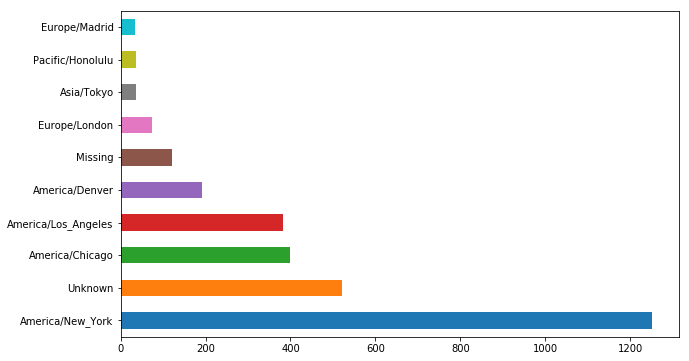

In [22]:
tz_counts[:10].plot(kind='barh', rot=0)

'a' 필드는 agent의 의미를 갖는데, url 축약에 사용된 브라우저, 단말기, 애플리케이션에 대한 정보를 담고 있다.

In [23]:
frame['a'][1]

'GoogleMaps/RochesterNY'

In [35]:
frame['a'][50]

u'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [36]:
frame['a'][51]

u'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P925/V10e Build/FRG83G) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1'

이 정보는 분석하기 어려워 보이나, 정규표현식을 이용하면 쉽게 첫번째 문자열 토큰을 구분할 수 있다.

In [37]:
results = Series([x.split()[0] for x in frame.a.dropna()])
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [38]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

#### 3) cross table의 생성
tz의 빈도를 윈도우 사용자와 비 윈도우 사용자 그룹으로 나누어, cross table을 생성하자.
- agent 필드에 window가 있으면 윈도우 사용자라 판단하며
- agent 필드가 존재하지 않거나, 값이 없으면 제거하자.

>참고로, agent 필드가 존재하지 않는 라인을 제거하는 것은 dropna이며, 그 뿐아니라 값이 null인 것도 제거하는 것은 notnull 메소드이다.

In [44]:
dropna = Series([1 for x in frame.a.dropna()])
print (dropna.value_counts())
notnull = Series([1 for x in frame.a.notnull()])
print (notnull.value_counts())

1    3440
dtype: int64
1    3560
dtype: int64


1) 이제 frame의 레코드 중 a 필드의 값이 notnull인 것만 추려서 cframe으로 설정하자.

In [4]:
cframe = frame[frame.a.notnull()] # boolean 조건식은 Numpy array에서 가져온 특성이다.

NameError: name 'frame' is not defined

2) group 변수를 생성하고

In [59]:
operating_system = np.where(cframe['a'].str.contains('Windows'),
                            'Windows', 'Not Windows')
operating_system[:5]

array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows'], 
      dtype='|S11')

3) tz 필드와 operating_system 시리즈로 그루핑하고

In [60]:
by_tz_os = cframe.groupby(['tz', operating_system])

4) 그룹별 빈도를 계산하고(size), 행열 열로 바꾸어(unpack), 결측치를 0으로 변경하여 첫 10개를 표시하면

In [61]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts[:10]

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


5) tz 기준으로 순위(index)를 매겨 마지막 10개(top 10)를 구해보자.
- 이를 위해 열(axis=1) 단위로 합산하여 순위를 생성(argsort)하고
- 이 순위에 따라 취하여(take) 마지막 열개(-10)를 가져온다.

In [82]:
# Use to sort in ascending order
indexer = agg_counts.sum(1).argsort()
list(indexer)[:10]

[24, 20, 21, 92, 87, 53, 54, 57, 26, 55]

>해석:
- 가장 낮은 것은 agg_counts 시리즈의 24번째 라는 의미
- 그 다음 낮은 것은 20번째 이고, 그 다음은 21번째 라는 의미

In [92]:
agg_counts[20:25]

,Not Windows,Windows
tz,,
America/La_Paz,0.0,1.0
America/Lima,0.0,1.0
America/Los_Angeles,130.0,252.0
America/Managua,0.0,3.0
America/Mazatlan,1.0,0.0


- top 10을 취해보면:

In [84]:
count_subset = agg_counts.take(indexer)[-10:]
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


6) 이제 수평 막대(barh) 그래프를 그리는데, 누적(stacked) 막대그래프를 이용해보자.

In [64]:
plt.figure()

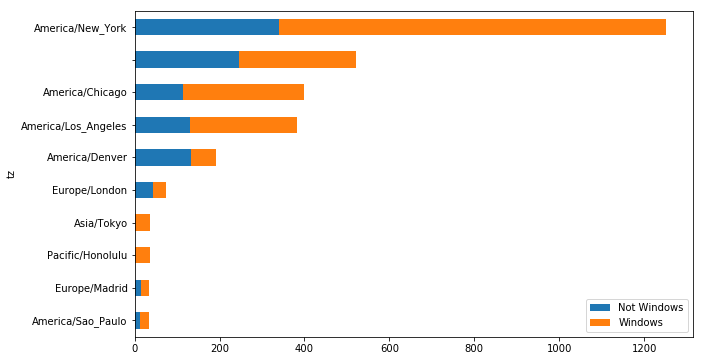

In [94]:
count_subset.plot(kind='barh', stacked=True)

7) 표준화된 막대 그래프를 통해 각 tz별로 windows의 비율을 시각적으로 확인해보자.
- 이를 위해 각 tz 별로 tz 각각의 합(sum(1))으로 나누어(div, axis=0) 시각화한다.

In [95]:
plt.figure()

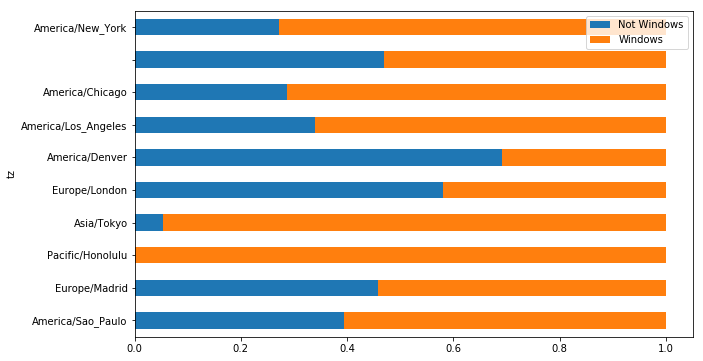

In [96]:
normed_subset = count_subset.div(count_subset.sum(1), axis=0)
normed_subset.plot(kind='barh', stacked=True)

전반적인 개요 수준에서 이렇게 분석하고 시각화할 수 있다는 정도만 알아두자.

자세한 사항은 앞으로 차근차근 알아볼 것이다.

## 2.2 MovieLens 1M data set
GroupLens 연구소(http://www.grouplens.org/node/73)는 미네소타 대학 연구소로 영화 추천 서비스를 위해 1990년 말 부터 2000년 초 까지의 MovieLens 사용자로부터 수집한 방대한 영화 평점 데이터를 제공하고 있다.

이 데이터에는 영화 평점, 영화 정보(장르, 개봉 연도 등), 평점을 매긴 사용자에 대한 정보(나이, 우편번호, 성별, 직업 등)가 포함되어 있다. 이 데이터는 주로 추천 시스템을 개발하는 데 유용하게 사용된다.

MovieLens 1M(백만 개) 데이터셋은 약 6,000 여 명의 사용자들로부터 수집한 4,000 여 편의 영화에 대한 백만 개의 영화 평점을 담고 있따. 이 데이터셋은 평점, 사용자 정보, 영화 정보 3가지의 테이블을 zip 파일에 압축하여 담고 있다.

datasets 폴더에서는 이 파일을 압축해제하여 dat 파일 포맷으로 담고 있다. 이 파일을 DataFrame 객체로 불러오자.

>에 대한 좋은 R의 예제는 [다음](https://statkclee.github.io/ml/ml-text-movielens.html)과 같다. 이 결과를 나중에 pandas를 이용하여 처리해보자.


In [5]:
# dataset : 1. users, 2. movies, 3. ranks

### 2.2.1 data 훑어보자

In [103]:
!type ..\datasets\movielens\movies.dat | more

1::Toy Story (1995)::Animation|Children's|Comedy
2::Jumanji (1995)::Adventure|Children's|Fantasy
3::Grumpier Old Men (1995)::Comedy|Romance
4::Waiting to Exhale (1995)::Comedy|Drama
5::Father of the Bride Part II (1995)::Comedy
6::Heat (1995)::Action|Crime|Thriller
7::Sabrina (1995)::Comedy|Romance
8::Tom and Huck (1995)::Adventure|Children's
9::Sudden Death (1995)::Action
10::GoldenEye (1995)::Action|Adventure|Thriller
11::American President, The (1995)::Comedy|Drama|Romance
12::Dracula: Dead and Loving It (1995)::Comedy|Horror
13::Balto (1995)::Animation|Children's
14::Nixon (1995)::Drama
15::Cutthroat Island (1995)::Action|Adventure|Romance
16::Casino (1995)::Drama|Thriller
17::Sense and Sensibility (1995)::Drama|Romance
18::Four Rooms (1995)::Thriller
19::Ace Ventura: When Nature Calls (1995)::Comedy
20::Money Train (1995)::Action
21::Get Shorty (1995)::Action|Comedy|Drama
22::Copycat (1995)::Crime|Drama|Thriller
23::Assassins (1995)::Thriller
24::Powder (1995)::Drama|Sci-Fi
25::Le

- :: 을 구분자로 사용했음을 확인할 수 있다.

encoding을 아래와 같이 수정하여 로딩하자.

In [7]:
import pandas as pd
import os
encoding = 'latin1'
# encoding = "utf-8"

upath = os.path.expanduser('../datasets/movielens/users.dat')
rpath = os.path.expanduser('../datasets/movielens/ratings.dat')
mpath = os.path.expanduser('../datasets/movielens/movies.dat')

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
mnames = ['movie_id', 'title', 'genres']

users = pd.read_csv(upath, sep='::', header=None, names=unames, encoding=encoding)
ratings = pd.read_csv(rpath, sep='::', header=None, names=rnames, encoding=encoding)
movies = pd.read_csv(mpath, sep='::', header=None, names=mnames, encoding=encoding)

C:\Users\great\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
C:\Users\great\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
C:\Users\great\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


In [119]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


- 나이와 직업은 실제 값이 아니라, 범주화된 코드 값이다.
- README 파일에서 확인할 수 있다.

```
- Age is chosen from the following ranges:

	*  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"

- Occupation is chosen from the following choices:

	*  0:  "other" or not specified
	*  1:  "academic/educator"
	*  2:  "artist"
	*  3:  "clerical/admin"
	*  4:  "college/grad student"
	*  5:  "customer service"
	*  6:  "doctor/health care"
	*  7:  "executive/managerial"
	*  8:  "farmer"
	*  9:  "homemaker"
	* 10:  "K-12 student"
	* 11:  "lawyer"
	* 12:  "programmer"
	* 13:  "retired"
	* 14:  "sales/marketing"
	* 15:  "scientist"
	* 16:  "self-employed"
	* 17:  "technician/engineer"
	* 18:  "tradesman/craftsman"
	* 19:  "unemployed"
	* 20:  "writer"
```

In [105]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [106]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


- 장르는 다음과 같이 구분되며, 중복될 수 있다.

```
	* Action
	* Adventure
	* Animation
	* Children's
	* Comedy
	* Crime
	* Documentary
	* Drama
	* Fantasy
	* Film-Noir
	* Horror
	* Musical
	* Mystery
	* Romance
	* Sci-Fi
	* Thriller
	* War
	* Western
```

In [107]:
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


#### 1) 나이와 성별에 따른 영화의 평균 평점 구하기
1. pandas의 merge 함수를 이용하여 ratings 테이블과 users 테이블을 병합한 후,
2. 이 데이터를 다시 movies 데이터와 병합하면 쉽게 처리할 수 있다.
3. 이때 증복되는 열을 키로 사용하여 병합할 수 있다.

In [8]:
data = pd.merge(pd.merge(ratings, users), movies)
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
5,18,1193,4,978156168,F,18,3,95825,One Flew Over the Cuckoo's Nest (1975),Drama
6,19,1193,5,982730936,M,1,10,48073,One Flew Over the Cuckoo's Nest (1975),Drama
7,24,1193,5,978136709,F,25,7,10023,One Flew Over the Cuckoo's Nest (1975),Drama
8,28,1193,3,978125194,F,25,1,14607,One Flew Over the Cuckoo's Nest (1975),Drama
9,33,1193,5,978557765,M,45,3,55421,One Flew Over the Cuckoo's Nest (1975),Drama


간단하게 머징된 결과를 보면

In [109]:
data.ix[0]

C:\Users\great\Anaconda3\envs\py27\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  if __name__ == '__main__':


user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [110]:
data.iloc[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

이제 pivot_table 메소드를 이용하여 성별로 평균을 구하면:

In [12]:
mean_ratings = data.pivot_table('rating', index='title',
                                columns='gender', aggfunc='mean')
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


성별과 연령에 따라 평균을 구할 수도 있다.

In [11]:
mean_ratings1 = data.pivot_table('rating', index='title',
                                columns=['gender', 'age'], aggfunc='mean')
mean_ratings1[:5]

gender                           F                                      \
age                             1         18        25        35    45   
title                                                                    
$1,000,000 Duck (1971)         NaN  5.000000  3.333333  3.222222   NaN   
'Night Mother (1986)           3.0  4.500000  3.500000  3.000000  3.75   
'Til There Was You (1997)      2.0  2.666667  2.666667  3.000000  2.50   
'burbs, The (1989)             NaN  3.035714  2.540541  3.062500  2.00   
...And Justice for All (1979)  NaN       NaN  3.777778  3.750000  4.00   

gender                                               M                      \
age                                  50        56   1         18        25   
title                                                                        
$1,000,000 Duck (1971)         3.333333       NaN  NaN  2.600000  3.000000   
'Night Mother (1986)           2.750000       NaN  1.0  5.000000  3.250000   
'Til There Was You (1997)      2.500000  3.000000  5.0  2.000000  2.666667   
'burbs, The (1989)             3.142857  1.000000  4.5  3.338710  2.705128   
...And Justice for All (1979)  3.666667  4.333333  3.0  3.428571  3.714286   

gender                                                                 
age                                  35        45        50        56  
title                                                                  
$1,000,000 Duck (1971)         3.000000  2.000000  1.000000       NaN  
'Night Mother (1986)           2.857143  4.000000  4.200000  4.333333  
'Til There Was You (1997)      2.857143  2.000000       NaN  2.000000  
'burbs, The (1989)             2.717949  2.750000  3.235294  3.000000  
...And Justice for All (1979)  3.637931  4.133333  3.521739  3.818182

#### 2) 250건 이상의 평점정보가 있는 영화만 추려보자.
데이터를 title로 그루핑하고, 그 빈도를 size 함수로 Series 객체로 생성한다.

In [13]:
ratings_by_title = data.groupby('title').size()

In [14]:
ratings_by_title[:5]

title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

mean_ratings에서 250건 이상의 평점 정보를 추출하기 위한 색인을 생성한다.

In [15]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [16]:
active_titles[:10]

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)'],
      dtype='object', name='title')

In [17]:
mean_ratings = mean_ratings.ix[active_titles]
mean_ratings

C:\Users\great\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
"13th Warrior, The (1999)",3.112000,3.168000
2 Days in the Valley (1996),3.488889,3.244813
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205
2001: A Space Odyssey (1968),3.825581,4.129738


In [18]:
mean_ratings = mean_ratings.rename(index={'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)':
                           'Seven Samurai (Shichinin no samurai) (1954)'})

#### 3) 여성에서 높은 평점을 받은 영화를 선택해보자.
이를 위해 F 열을 기준으로 정렬하기 위해 sort_index 또는 sort_values 함수를 사용한다.

In [19]:
top_female_ratings = mean_ratings.sort_index(by='F', ascending=False)
top_female_ratings[:10]

C:\Users\great\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  if __name__ == '__main__':


gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


In [20]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


여성과 남성의 선호도에 대한 차이가 있을까?

In [38]:
plt.figure()

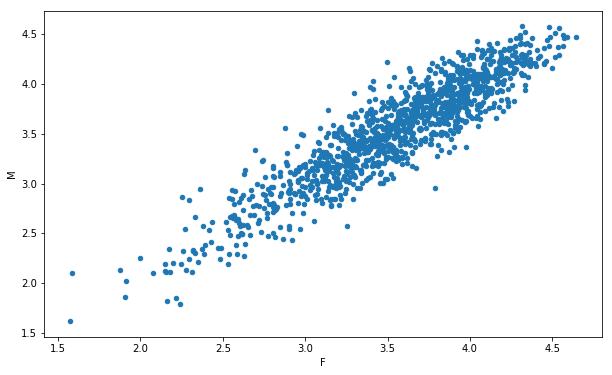

In [39]:
mean_ratings.plot(kind='scatter', x='F', y='M')
plt.show()

### 2.2.2 Measuring rating disagreement
이번엔 남녀간 호불호가 갈리는 영화를 찾아보자. 

mean_ratings에 평균 평점 차를 생생하고 이로부터 정렬해보자.

In [40]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

In [41]:
sorted_by_diff = mean_ratings.sort_index(by='diff')
sorted_by_diff[:15]


C:\Users\great\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  if __name__ == '__main__':


gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


역순으로 정렬하면 남자들이 더 선호하는 영화를 찾을 수도 있다.

In [42]:
# Reverse order of rows, take first 15 rows
sorted_by_diff[::-1][:15]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


#### 성별과 관련없이 호불호가 극명하게 나뉘는 영화를 찾아보자.
1. rating 필드에대한 분산 또는 표준편차를 통해 확인할 수 있다.
2. 단, 250개 이상의 평점을 갖고 있는 영화에 대해서만 분석하자.

In [49]:
# Standard deviation of rating grouped by title
rating_std_by_title = data.groupby('title')['rating'].std()
# Filter down to active_titles
rating_std_by_title = rating_std_by_title.loc[active_titles]
# Order Series by value in descending order
# rating_std_by_title.order(ascending=False)[:10]
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

## 2.3 US Baby Names 1880-2010
미국 사회보장국(SSA; Social Security Administration)에서는 1990년 부터 현재까지 가장 빈도가 높은 신생아 이름에 대한 정보를 제공한다. 특히 R 언어의 데이터 조작에서 많이 사용하는 예제이다.

이 데이터를 이용하여 여러 분석을 수행할 수 있다:
- 시대별 특정 이름이 차지하는 비율을 구하여 이름의 희소성을 알아볼 수 있다.
- 이름의 상대 순위
- 각 연도별 인기 있는 이름
- 모음/자음 길이, 다양성, 철자 변화 등 이름 유행 분석
- 성서 등장 이름, 유명인 등 외부 자료를 통한 유행 분석

In [62]:
from __future__ import division
from numpy.random import randn
import numpy as np
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 5))
np.set_printoptions(precision=4)
%pwd

'C:\\Users\\great\\Documents\\pydata-book-2nd-edition\\notebooks'

가공되지 않은 데이터는 미국 사회보장국의 웹사이트(http://www.ssa.gov/oact/babynames/limits.html) 에서 다운로드할 수 있다.

>현재는 서비스하고 있지 않다.

>대신 [이 사이트](대신 https://www.datalumos.org/datalumos/project/100670/version/V1/view;jsessionid=F374DB423977CE60327A412F8EBBB6F6)를 참고하자.

먼저 간단히 데이터의 구조를 살펴보자.
- 이름, 성별, 빈도를 ','를 구분자로 하여 제공한다.
- 아래서 살펴보겠지만, 5개 이상의 빈도를 가지는 데이터만 포함되어 있다.

In [53]:
!type ..\datasets\babynames\yob1880.txt

Mary,F,7065
Anna,F,2604
Emma,F,2003
Elizabeth,F,1939
Minnie,F,1746
Margaret,F,1578
Ida,F,1472
Alice,F,1414
Bertha,F,1320
Sarah,F,1288
Annie,F,1258
Clara,F,1226
Ella,F,1156
Florence,F,1063
Cora,F,1045
Martha,F,1040
Laura,F,1012
Nellie,F,995
Grace,F,982
Carrie,F,949
Maude,F,858
Mabel,F,808
Bessie,F,794
Jennie,F,793
Gertrude,F,787
Julia,F,783
Hattie,F,769
Edith,F,768
Mattie,F,704
Rose,F,700
Catherine,F,688
Lillian,F,672
Ada,F,652
Lillie,F,647
Helen,F,636
Jessie,F,635
Louise,F,635
Ethel,F,633
Lula,F,621
Myrtle,F,615
Eva,F,614
Frances,F,605
Lena,F,603
Lucy,F,591
Edna,F,588
Maggie,F,582
Pearl,F,569
Daisy,F,564
Fannie,F,560
Josephine,F,544
Dora,F,524
Rosa,F,507
Katherine,F,502
Agnes,F,473
Marie,F,471
Nora,F,471
May,F,462
Mamie,F,436
Blanche,F,427
Stella,F,414
Ellen,F,411
Nancy,F,411
Effie,F,406
Sallie,F,404
Nettie,F,403
Della,F,391
Lizzie,F,388
Flora,F,365
Susie,F,361
Maud,F,345
Mae,F,344
Etta,F,323
Harriet,F,319
Sadie,F,317
Caroline,F,306
Katie,F,303
Lydia,F,302
Elsie,F,301
Kate,F,299
Susan,

In [54]:
import pandas as pd
names1880 = pd.read_csv('../datasets/babynames/yob1880.txt', names=['name', 'sex', 'births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


위 데이터를 기반으로 신생아의 남/여 비율을 측정해보자.

In [55]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110493
Name: births, dtype: int64

In [57]:
!dir /w ..\datasets\babynames

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 7465-91A5

 C:\Users\great\Documents\pydata-book-2nd-edition\datasets\babynames 디렉터리

[.]                  [..]                 NationalReadMe.pdf
yob1880.txt          yob1881.txt          yob1882.txt
yob1883.txt          yob1884.txt          yob1885.txt
yob1886.txt          yob1887.txt          yob1888.txt
yob1889.txt          yob1890.txt          yob1891.txt
yob1892.txt          yob1893.txt          yob1894.txt
yob1895.txt          yob1896.txt          yob1897.txt
yob1898.txt          yob1899.txt          yob1900.txt
yob1901.txt          yob1902.txt          yob1903.txt
yob1904.txt          yob1905.txt          yob1906.txt
yob1907.txt          yob1908.txt          yob1909.txt
yob1910.txt          yob1911.txt          yob1912.txt
yob1913.txt          yob1914.txt          yob1915.txt
yob1916.txt          yob1917.txt          yob1918.txt
yob1919.txt          yob1920.txt          yob1921.txt
yob1922.txt          yob1923.txt          yob1924.txt
yob1925.

이제 전체 data에 대한 DataFrame을 생성하기 위해, concat 함수를 사용하자.

In [58]:
# 2010 is the last available year right now
years = range(1880, 2011)

pieces = []
columns = ['name', 'sex', 'births']

for year in years: #반복된 파일명을 가진 경우 쓸 수 있는 기술
    path = '../datasets/babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)

    frame['year'] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

출생빈도 births를 년도와 성별로 집계하자.

In [59]:
total_births = names.pivot_table('births', index='year',
                                 columns='sex', aggfunc=sum)

In [60]:
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


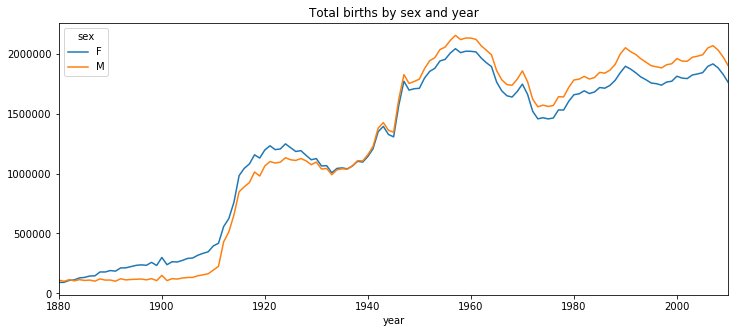

In [66]:
total_births.plot(title='Total births by sex and year')
plt.show()

- 과거에는 출생아에 여아가 더 많았으나, 1940년을 기점으로 역전되어 남아가 더 많아지고 있는 추세이다.

이제 연도별 성별로 각 이름이 차지하는 비율을 구해보자.

In [67]:
def add_prop(group):
    # Integer division floors
    births = group.births.astype(float)

    group['prop'] = births / births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

In [68]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


그룹 연산에서 각 group의 group 비율의 합이 1이 되는 지 확인해보는 senity test를 실시해보자. 이를 위해 np.allclose 함수를 사용한다.

In [69]:
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

이제 분석에 사용할 연도별, 성별에 따라 빈도수가 높은 1000개의 이름을 추출하자.
- 최대 (2011-1880) x 2 x 1000 = 262,000 개의 레코드가 생성될 것이다.

In [70]:
def get_top1000(group):
    return group.sort_index(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000) # 모든 group에 f을 적용해라.

C:\Users\great\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


In [71]:
top1000.index = np.arange(len(top1000))

In [72]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


함수를 사용하지 않고, 생성한다면 다음과 같이 작업할 수 있다.

In [83]:
i=0
for year, group in names.groupby(['year', 'sex']):
    if (i==0):
        print(year); print(type(year))
        print(group[:2]); print(type(group))
    i+=1

(1880, 'F')
<class 'tuple'>
   name sex  births  year      prop
0  Mary   F    7065  1880  0.077643
1  Anna   F    2604  1880  0.028618
<class 'pandas.core.frame.DataFrame'>


- 여기서 GroupBy 객체는 a tupe of groubby variables 와 grouped df을 리턴하는 iterator로서 동작한다.
- 자세한 내용은 [관련 문서](http://pandas.pydata.org/pandas-docs/stable/groupby.html#iterating-through-groups)를 참고한다.

In [78]:
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
top1000_1 = pd.concat(pieces, ignore_index=True)
top1000_1.index = np.arange(len(top1000_1))
top1000_1

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


예상했던 숫자보다 더 적게 나왔다. 어디서 더 적게 추출되었을까? 확인해보자.

In [92]:
for groupByVars, group in names.groupby(['year', 'sex']):
    print(groupByVars)
    print("number of group  : ", len(group))
    print("number of top1000: ", len(group.sort_values(by='births', ascending=False)[:1000]))

(1880, 'F')
number of group  :  942
number of top1000:  942
(1880, 'M')
number of group  :  1058
number of top1000:  1000
(1881, 'F')
number of group  :  938
number of top1000:  938
(1881, 'M')
number of group  :  997
number of top1000:  997
(1882, 'F')
number of group  :  1028
number of top1000:  1000
(1882, 'M')
number of group  :  1099
number of top1000:  1000
(1883, 'F')
number of group  :  1054
number of top1000:  1000
(1883, 'M')
number of group  :  1030
number of top1000:  1000
(1884, 'F')
number of group  :  1172
number of top1000:  1000
(1884, 'M')
number of group  :  1125
number of top1000:  1000
(1885, 'F')
number of group  :  1197
number of top1000:  1000
(1885, 'M')
number of group  :  1097
number of top1000:  1000
(1886, 'F')
number of group  :  1282
number of top1000:  1000
(1886, 'M')
number of group  :  1110
number of top1000:  1000
(1887, 'F')
number of group  :  1306
number of top1000:  1000
(1887, 'M')
number of group  :  1067
number of top1000:  1000
(1888, 'F')
nu

### 2.3.1 Analyzing naming trends
위에서 구한 상위 1000개 데이터를 남여로 구분하자.

In [88]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

연도별로 "John"이나 "Mary"라는 이름의 추이를 그래프로 그리고자 한다.
- 이를 위해 연도와 이름에 대한 전체 출생수를 피벗 table로 만들어야한다.

In [93]:
total_births = top1000.pivot_table('births', index='year', columns='name',
                                   aggfunc=sum)
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
1885,NaN,NaN,NaN,88.0,NaN,6.0,NaN,NaN,NaN,88.0,...,6.0,27.0,NaN,NaN,12.0,6.0,14.0,48.0,38.0,NaN
1886,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN,84.0,...,13.0,25.0,NaN,NaN,8.0,NaN,20.0,52.0,43.0,NaN
1887,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,104.0,...,9.0,34.0,NaN,NaN,23.0,NaN,28.0,46.0,33.0,NaN
1888,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,137.0,...,11.0,42.0,NaN,NaN,23.0,7.0,30.0,42.0,45.0,NaN


plot 메소드로 몇몇 이름에 대한 연도별 추이 그래프를 그려보자.

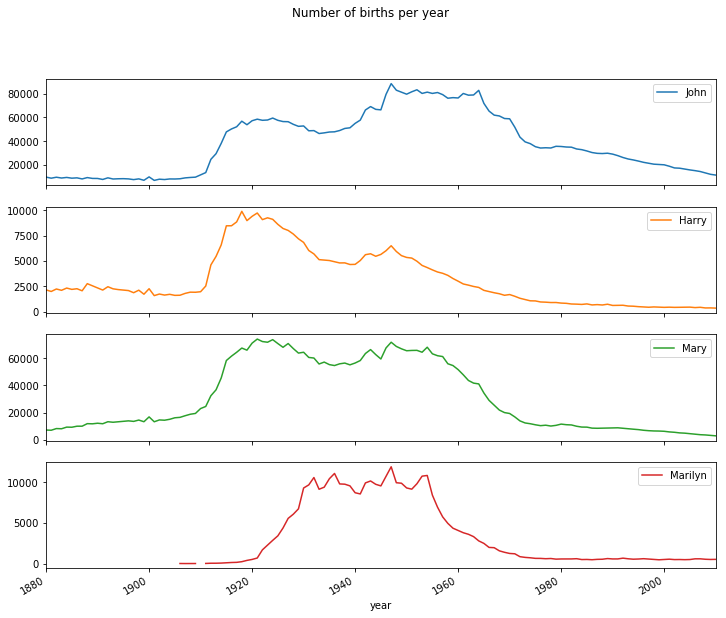

In [96]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12, 10), grid=False, # subplot : 각 항목별 구분, grid : ?
            title="Number of births per year")
plt.show()

최근에는 John, Harry, Mary, Marilyn 등의 이름이 인기가 없다는 것을 알 수 있다. 하지만, 더 정확히는 신생아의 비율로 확인하는 것이 더 적당하다.

In [1]:
total_births1 = top1000.pivot_table('prop', index='year', columns='name', # index는 row로 naming
                                   aggfunc=sum)
subset1 = total_births1[['John', 'Harry', 'Mary', 'Marilyn']]
subset1.plot(subplots=True, figsize=(12, 10), grid=False,
            title="props of births per year")
plt.show()

NameError: name 'top1000' is not defined

비율로 보면 1910년대에 유행이 된 것이 아니라, marilyn을 제외하고는 과거부터 유행이었는 데, 시간이 갈수록 점점 인기도가 하락한 것으로 봐야한다.

#### 1) Measuring the increase in naming diversity
위의 결과로 흔한 이름을 신생아에게 부여하는 것을 부모들이 기피한다고 판단할 수 있다. 인기 있는 이름 1000개가 전체 출생아 수에 차지하는 비율을 그려보자.

>그러나 사실, 이민자수의 증가라든지 다른 영향도 살펴봐야 맞을 것이다.

In [98]:
plt.figure()

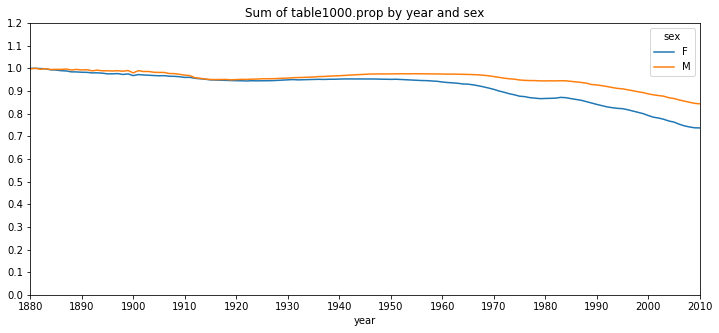

In [100]:
table = top1000.pivot_table('prop', index='year',
                            columns='sex', aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex',
           yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))
plt.show()

In [ ]:
np.linspace(0, 1.2, 13) # 0부터 1.2까지 13개의 점을 만들어라. making vector 

- 신생아의 이름의 다양성이 높아지고 있음을 알 수 있다. 

인기있는 이름 순으로 정렬했을 때, 전체 출생 수의 50%까지 등장하는 이름의 개 수도 흥미롭다.

In [101]:
df = boys[boys.year == 2010]
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
260882,Alexander,M,16634,2010,0.008762
260883,Noah,M,16281,2010,0.008576
260884,Daniel,M,15679,2010,0.008259
260885,Aiden,M,15403,2010,0.008114
260886,Anthony,M,15364,2010,0.008093


In [102]:
prop_cumsum = df.sort_index(by='prop', ascending=False).prop.cumsum() # cumsum : 누적 sum
prop_cumsum[:10]

C:\Users\great\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  if __name__ == '__main__':


260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

2010년 남아 신생아를 정렬된 상태에서 누계가 0.5가 되는 index를 구한다. # 0.5가 차지하는 비율은 전체의 50%임을 구할 수 있음.
- 이미 top1000 테이블은 prop 또는 births에 의해 내림차순으로 정렬되어 있다.
- 배열의 색인이 0부터 시작하기 때문에, 117번째의 data가 해당한다.

In [104]:
prop_cumsum.values.searchsorted(0.5) # searchsorted : array 함수. 

116

그럼 1900년에는 어떠했을까? 25개의 이름이 전체 이름의 50% 비율에 육박함을 확인할 수 있다.

In [105]:
df = boys[boys.year == 1900]
in1900 = df.sort_index(by='prop', ascending=False).prop.cumsum()
in1900.values.searchsorted(0.5)

C:\Users\great\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


25

이제 이를 일반화하면:


In [107]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')
diversity

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16
1885,40,16
1886,41,16
1887,41,17
1888,42,17


- 확실히 전체 50%를 차지하는 이름의 개수가 점점 더 늘어나, 남녀공히 다양성이 커짐을 확인할 수 있다.
- 다만 여전히 여성의 이름은 아직도 남자보다 더 다양하다.

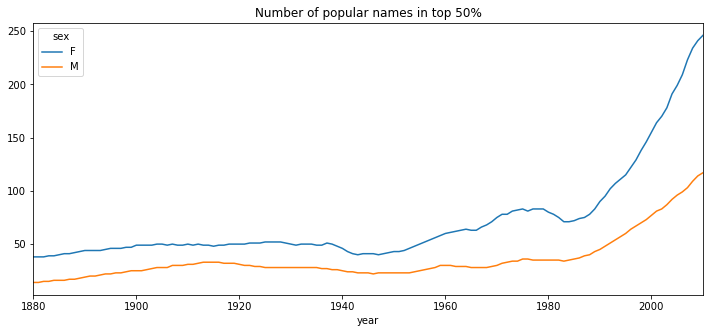

In [111]:
diversity.plot(title="Number of popular names in top 50%")
plt.show()

#### 2) The "Last letter" Revolution
2007년 작명을 연구하는 로라 와튼버그는 지난 100년 간 남자아이 이름의 마지막 문자의 분포에 큰 변화가 있다고 주장하였다.(www.babynamewizard.com) 

연도와 성별로 이름의 마지막 문자를 수집하여 확인해보자.

In [ ]:
last_letter.name = 

In [115]:
# extract last letter from name column
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter) # names(name, sex, births, year)에서 name 뽑아내고 map 함수(f(l[0]),f(l[1]), ...) 적용
last_letters.name = 'last_letter' # Series's labelling, 함수는 아님.

table = names.pivot_table('births', index=last_letters,
                          columns=['sex', 'year'], aggfunc=sum)
table.head()

sex                F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   

sex                                       ...            M            \
year            1887     1888     1889    ...         2001      2002   
last_letter                               ...                          
a            48942.0  59442.0  58631.0    ...      39124.0   38815.0   
b                NaN      NaN      NaN    ...      50950.0   49284.0   
c                NaN      NaN      NaN    ...      27113.0   27238.0   
d             1027.0   1298.0   1374.0    ...      60838.0   55829.0   
e            54353.0  66750.0  66663.0    ...     145395.0  144651.0   

sex                                                                      \
year             2003      2004      2005      2006      2007      2008   
last_letter                                                               
a             37825.0   38650.0   36838.0   36156.0   34654.0   32901.0   
b             48065.0   45914.0   43144.0   42600.0   42123.0   39945.0   
c             27697.0   26778.0   26078.0   26635.0   26864.0   25318.0   
d             53391.0   51754.0   50670.0   51410.0   50595.0   47910.0   
e            144769.0  142098.0  141123.0  142999.0  143698.0  140966.0   

sex                              
year             2009      2010  
last_letter                      
a             31430.0   28438.0  
b             38862.0   38859.0  
c             24048.0   23125.0  
d             46172.0   44398.0  
e            135496.0  129012.0  

[5 rows x 262 columns]

전체 기간 중 3 지점만 골라 이름의 마지막 몇 글자를 출력해보자.
>그러나 각 50년 씩 차이가 나는 것이 추세에 의한 것인지 임의적인 random 성격인지 확인할 필요가 있다

In [116]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year') # year에서 3 지점을 골라서 reindex
subtable.head()
# cf) .reindex(columns=['F'], level = 'Sex')

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

성별로 마지막 문자가 차지하는 비율을 계산하기 위해 전체 문자의 합을 계산해보자.

In [117]:
subtable.sum() # axis=None이지만, None인 경우 axis=0으로 지정.

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [118]:
letter_prop = subtable / subtable.sum().astype(float)

In [122]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8)) # axes : 그림을 놓을 수 있는 판의 의미. 일종의 list
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',
                      legend=False)

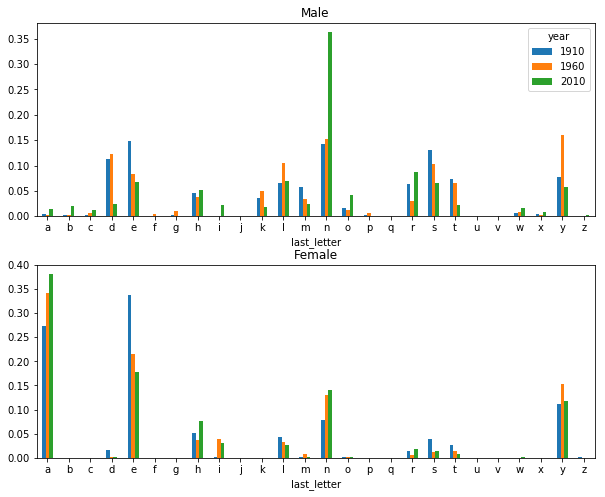

In [123]:
plt.subplots_adjust(hspace=0.25) # horizon space 0.25 떨어 뜨려봐.
plt.show()

- 남자아이의 이름이 n으로 끝나는 비율이 급격히 증가하였다.

이를 전체 자료로 돌아가 출생연도와 성별로 정규화하고, 남자아이 이름에서 몇 글짜를 선택하여 이 이름을 열로 하는 시계열 데이터로 변환하자.

In [ ]:
[3] # 색인
[:3] # 영구 색인
[[3, 14, 15]] # 불연속 색인 fancy indexing = boolean indexing

In [138]:
letter_prop = table / table.sum().astype(float)

# dny_ts = letter_prop.ix[['d', 'n', 'y'], 'M'].T
dny_ts = letter_prop.iloc[[3, 13, 24]]['M'].T # transpose
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


In [139]:
plt.close('all')

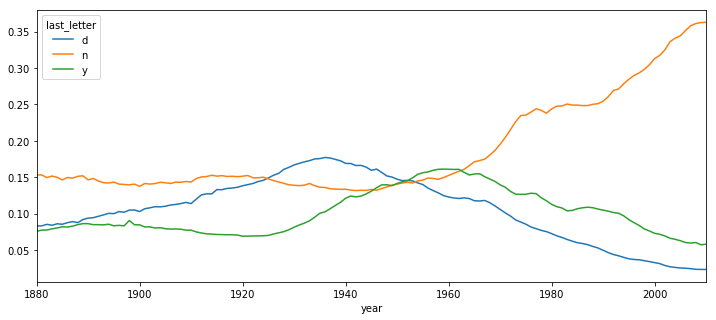

In [140]:
dny_ts.plot()
plt.show()

#### 3) Boy names that became girl names (and vice versa)
예전에는 남아 이름으로 선호되었다가 현재는 여아로 선호되는 경향도 존재한다. 예를 들면, Lesley 또는 Leslie 라는 이름이 그렇다. top1000 데이터를 이용하여 lesl로 시작하는 이름의 리스트를 만들어 보자.

- 먼저 lesl가 포함되는 unique name 집합을 생성하고

In [141]:
all_names = top1000.name.unique() # unique한 element 반환
mask = np.array(['lesl' in x.lower() for x in all_names]) # boolean을 값으로 하는 array, boolean indexing
lesley_like = all_names[mask]
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

- 이 이름 집합에 속하는 데이터만 뽑아서
- 각 이름의 전체 합을 구하고

In [142]:
filtered = top1000[top1000.name.isin(lesley_like)] # top1000에서 boolean vector를 이용해서 indexing
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

- 이 이름 집합으로 피봇테이블을 구성한 후
- 연도별로 모든 이름에 대해 성별로 출생아 수를 합하고
- 각 연도별 성별 합계(sum(1))로 각 행(axis=0)을 나눠주면

>table.sum(axis=None, skipna=None, level=None, numeric_only=None, **kwargs)

표준화된 table을 구할 수 있다.

In [147]:
table = filtered.pivot_table('births', index='year',
                             columns='sex', aggfunc='sum')
table = table.div(table.sum(1), axis=0)
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


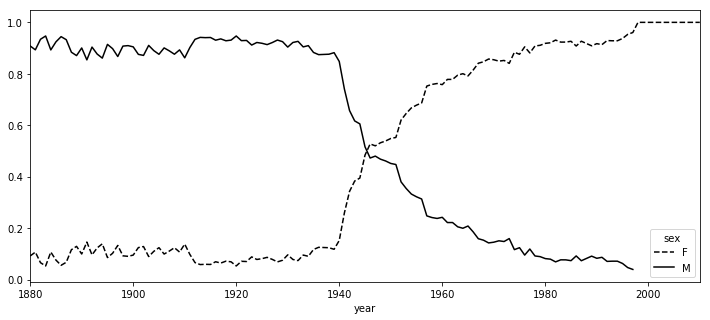

In [148]:
plt.close('all')
table.plot(style={'M': 'k-', 'F': 'k--'}) # k- : 검은색 실선, k-- : 검은색 점선
plt.show()

lesl 로 시작하는 이름은 과거에서는 압도적으로 남자 이름으로 사용되었으나 현재는 모두 여자 이름으로만 사용된다는 것을 확인할 수 있다.